# Time series analysis

In de gebruikte datasets tot nu toe is er verondersteld dat er geen correlatie is tussen de verschillende datapunten.
Dit is echter vaak niet het geval.
Bijvoorbeeld bij het voorspellen van beurskoersen of elektriciteitsverbruik.
In deze situaties zijn de datapunten geordend op basis van de tijd, dit wordt ook een tijdreeks of time-series genoemd, en zijn voorspelling sterk afhankelijk van de meest recente datapunten.
Meer informatie over time series analysis kan je ook [hier](https://towardsdatascience.com/time-series-analysis-using-pandas-in-python-f726d87a97d8) en [hier](https://towardsdatascience.com/time-series-modeling-using-scikit-pandas-and-numpy-682e3b8db8d1) vinden.

Waarom is het nu belangrijk om extra aandacht te besteden aan tijdreeksen?
Hoe zou de toekomst voorspeld kunnen worden van de volgende tijdreeks?
Een eenvoudig idee zou gewoon zijn om de tijdreeks met 1 dag te verschuiven.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

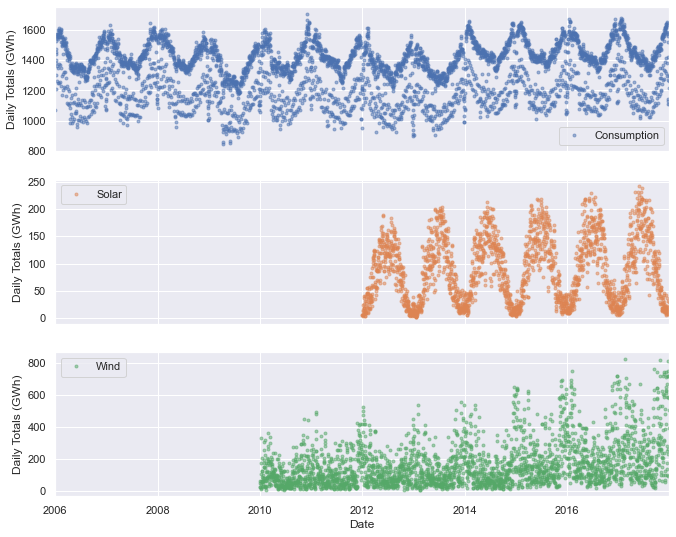

In [2]:
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url, index_col=0, parse_dates=True)
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

In [3]:
display(data.tail())
data.index

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

Bij het bestuderen valt het op dat de frequentie waarin de data opgenomen is duidelijk 1 rij per dag is.
Deze frequentie is echter niet gezet in de index (freq = None).
Dit kan gecorrigeerd worden als volgt

In [4]:
data = data.asfreq('D', method = 'ffill')

Andere veel gebruikte frequenties die gebruikt kunnen worden zijn
* "H": per uur
* "D": per dag
* "B": per werkdag
* "W": per week
* "M": per maand
* "Q": per kwartaal
* "Y": per jaar

De methode die hier gebruikt is, is forward fill.
Dit betekend dat als een rij Nan is, dat dan de waarde van de vorige rij gebruikt wordt.
Hiermee worden gaten in de dataset opgevuld.
In tijdreeksen is het namelijk niet aangewezen op vast waarden zoals het gemiddelde of constanten te nemen omdat de waarden gecorreleerd zijn met de tijd. 

### Resampling

Doordat de index en de frequentie van de tijdreeks correct ingesteld is, is het eenvoudig om de tijdreeks op andere tijdsschalen te bekijken.
Dit wordt ook resampling genoemd en kan als volgt gedaan worden waar er bijvoorbeeld het gemiddelde van de hele week of maximum van de maand gekozen kan worden.

In [5]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_weekly_mean = data[data_columns].resample('W').mean() # W stands for weekly
data_weekly_mean

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


In [8]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_monthly_max = data[data_columns].resample('M').max() # W stands for weekly
data_monthly_max

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,1613.31200,NaN,NaN,NaN
2006-02-28,1606.66700,NaN,NaN,NaN
2006-03-31,1545.83400,NaN,NaN,NaN
2006-04-30,1447.79800,NaN,NaN,NaN
2006-05-31,1380.17500,NaN,NaN,NaN
...,...,...,...,...
2017-08-31,1434.05200,455.379,216.117,601.010
2017-09-30,1460.61621,761.751,168.123,838.572
2017-10-31,1508.51484,819.818,123.715,846.617


### Rolling Windows

Een nadeel van bovenstaande resampling methoden is dat het aantal datapunten sterk gereduceerd wordt.
Bij resampling werden de datapunten verdeeld in niet-overlappende groepen of bins.
Bij rolling windows definieren we een groep of bin voor elk datapunt.
De bins hierbij mogen wel overlappen.
Dit kan bijvoorbeeld gebruikt worden om de gegevens uit te middelen of om de trend van de data te bestuderen.

In [9]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_7d_rol = data[data_columns].rolling(window = 7, center = True).mean()
display(data_7d_rol)

data_365d_rol = data[data_columns].rolling(window = 365, center = True).mean()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1208.214129,617.734286,17.807143,635.541429
2017-12-28,1203.265211,604.699143,19.240143,623.939286
2017-12-29,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Trends in Electricity Consumption')

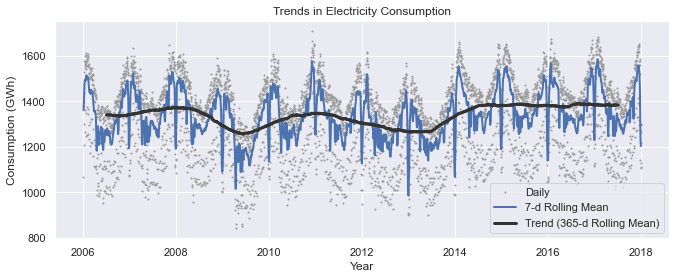

In [10]:
fig, ax = plt.subplots(figsize = (11,4))

# plotting daily data
ax.plot(data['Consumption'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')

# plotting 7-day rolling data
ax.plot(data_7d_rol['Consumption'], linewidth=2, label='7-d Rolling Mean')

# plotting annual rolling data
ax.plot(data_365d_rol['Consumption'], color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')

# Beautification of plot
#ax.xaxis.set_major_locator(dates.mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')

### Detrending

In bovenstaande figuur is het duidelijk dat de algemene elektriciteits consumptie redelijk stabiel is met twee dippen in 2009 en 2013.
Voor de trainingstijd en performantie van het model is het vaak aan te raden om de trend in een tijdreeks te verwijderen. 
Het verwijderen van de trendlijn zorgt ervoor dat de tijdreeks stationary wordt.
Dat wil zeggen dat de statistische eigenschappen zoals het gemiddelde en variantie constant blijft door de tijd.

De methode om dit te doen wordt differencing genoemd. 
Hierbij wordt er een nieuwe tijdreeks berekend die het verschil weergeeft tussen tijdstip t en t-1.
De formule voor dit te doen is:

$x'(t) = x(t) - x(t-1)$

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,311.337,NaN,NaN,NaN
2006-01-03,62.012,NaN,NaN,NaN
2006-01-04,14.684,NaN,NaN,NaN
2006-01-05,19.914,NaN,NaN,NaN


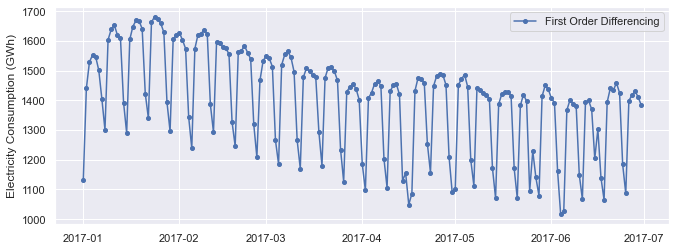

In [11]:
data_first_order_diff = data[data_columns].diff()

display(data.head())
display(data_first_order_diff.head())

start, end = '2017-01', '2017-06'

fig, ax = plt.subplots(figsize=(11, 4))

ax.plot(data.loc[start:end, 'Consumption'],
marker='o', markersize=4, linestyle='-', label='First Order Differencing')
ax.set_ylabel('Electricity Consumption (GWh)')
ax.legend()

In sommige situaties kan het mogelijk zijn dat het eerste order verschil er niet in slaagt om de trendlijn te verwijderen.
Een oplossing hiervoor is om gebruik te maken van het tweede orde verschil wat kan berekend worden met onderstaande formule

$x'(t) = x(t) - 2* x(t-1) + x(t-2)$

### Seasonality of periodicity

Tijdseries die gebaseerd zijn op het menselijk leven (zoals elektriciteitsconsumptie of de seizoenen) gaan zichzelf vaak herhalen met bepaalde perioden (bvb elk jaar, week, dag).
In bovenstaande figuren viel het al reeds op dat de zowel een jaarlijkse als een wekelijkse interval heeft dat zich herhaalt.

### Autocorrelation

Dit is een techniek om periodicity te gaan analyseren door de correlatie van de tijdreeks met een verschoven tijdreeks te gaan tekenen voor verschillende tijdsverschuivingen.

Intuitief wil dit het volgende zeggen: je verschuift de tijdseries met x aantal dagen/weken/maanden en berekent het verschil tussen de twee tijdseries.
Indien de tijdreeks een periodiciteit heeft van x dagen/weken/maanden dan zal dit verschil heel klein zijn of de correlatie heel hoog.
Door dit voor verschillende verschuivingen te doen kunnen de verschillende periodiciteiten gedetecteerd worden.

De resulterende plot ziet er als volgt uit:

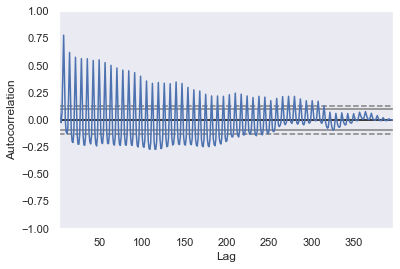

In [15]:
pd.plotting.autocorrelation_plot(data.loc['2012-01': '2013-01', 'Consumption'])

Hoe moet deze figuur geinterpreteerd worden?
* de x-as stelt de verschuiving van de data voor
* de y-as geeft de correlatie tussen de verschoven tijdreeks en de originele weer. Wanneer dit een piek vertoond, dan kan je stellen dat de tijdreeks zich na zoveel dagen herhaalt.
* De horizontale lijnen geven een indicatie van welke pieken statistisch relevant zijn. Elke piek die boven de gestreepte lijnen komt geeft aanlijding tot een herhaling van de tijdreeks.

Bovenstaande auto-correlation plot werd getekend voor de originele data.
We kunnen dit ook eens doen voor de tijdreeks waar de trend in de data verwijderd is. 
In deze plot is de periodiciteit sterker zichtbaar wat het belang van detrending weergeeft.

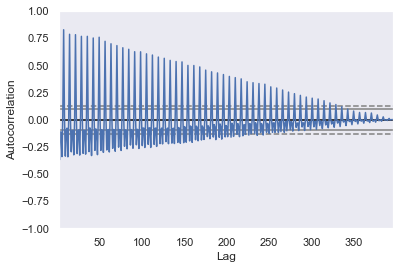

In [16]:
pd.plotting.autocorrelation_plot(data_first_order_diff.loc['2012-01': '2013-01', 'Consumption'])

## Modelleren van tijdreeksen

Er zijn een aantal geavanceerde packages beschikbaar voor het werken met tijdreeksen zoals ARIMA of Prophet (van Facebook).
Het is echter perfect mogelijk om de verschillende reeds geziene ML-technieken toe te passen op tijdreeksen.
Er zijn wel een paar belangrijke aandachtspunten om ervoor te zorgen dat je de orde van de tijdspunten respecteert.
Om dit aan te tonen gaan we proberen om het totale verbruik te voorspellen.
De dataset die beschikbaar is bevat data van 2006 tot en met 2017.
We kunnen bvb de eerste 11 jaar gebruiken voor het model te trainen en het laatste jaar te gebruiken als testdata om de performantie van het model te bepalen.

In [17]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

## Poging 1

Een eerste probleem bij het voorspellen van een tijdreeks is dat er een sterke mogelijkheid is dat het model steeds de laatste geziene waarde leert voorspellen.
Dit komt omdat er typisch bij tijdreeksen een grote kans is dat het verschil op 1 dag klein is.
Zo is de eenvoudigste manier om het weer van morgen te voorspellen te zeggen dat het hetzelfde gaat zijn als vandaag.

Dit kan je al wat zien op onderstaande figuur waar de blauwe lijn precies een beetje voorloopt op de orange lijn (namelijk 1 dag)
Het verschil in grootteordes is hier niet zo belangrijk. Dit komt vooral doordat er doorheen de jaren een stijgend gebruik is wat hier ook niet correct mee gemodelleerd kan worden.

In [57]:
# creating new dataframe from consumption column
data_consumption = data[['Consumption']]

# inserting new column with yesterday's consumption values
data_consumption.loc[:,'Yesterday'] = data_consumption.loc[:,'Consumption'].shift()

# dropping NAs
data_consumption = data_consumption.dropna()
data_consumption

C:\Users\jens.baetens3\AppData\Local\Temp\ipykernel_37256\1190376060.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_consumption.loc[:,'Yesterday'] = data_consumption.loc[:,'Consumption'].shift()


,Consumption,Yesterday
Date,,
2006-01-02,1380.52100,1069.18400
2006-01-03,1442.53300,1380.52100
2006-01-04,1457.21700,1442.53300
2006-01-05,1477.13100,1457.21700
2006-01-06,1403.42700,1477.13100
...,...,...
2017-12-27,1263.94091,1130.11683
2017-12-28,1299.86398,1263.94091
2017-12-29,1295.08753,1299.86398


0.33190030802561565


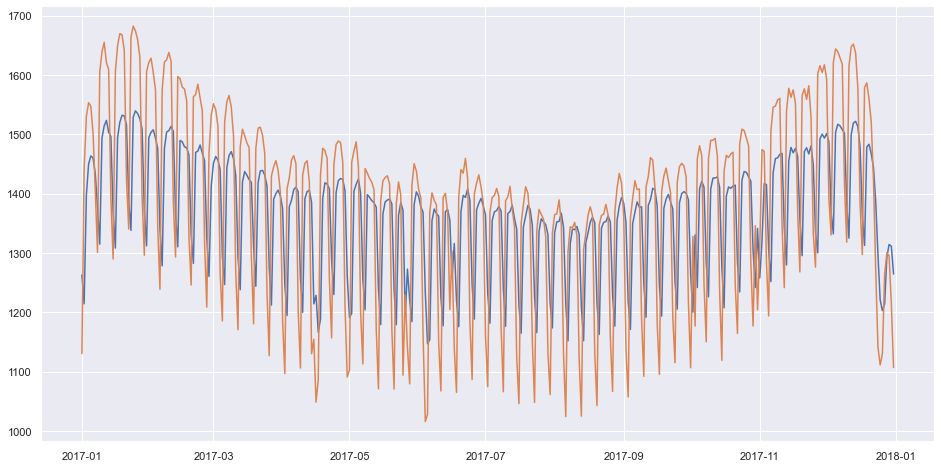

In [58]:
from sklearn.linear_model import LinearRegression

X_train = data_consumption[:'2016'].drop(['Consumption'], axis = 1)
y_train = data_consumption.loc[:'2016', 'Consumption']
X_test = data_consumption.loc['2017'].drop(['Consumption'], axis = 1)
y_test = data_consumption.loc['2017', 'Consumption']

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

predictions = model.predict(X_test)

plt.figure(figsize=(16,8))
plt.plot(X_test.index, predictions)
plt.plot(X_test.index, y_test)

Om bovenstaande probleem op te lossen kan het handig zijn om eerder te werken met de verschillen tussen opeenvolgende dagen dan met de echte waarden.
De simpelste features die gebruikt kunnen worden om het verbruik van vandaag te voorspellen zijn het verbruik van gisteren en het verschil van het verbruik van gisteren en eergisteren.
Het dataframe met deze data kan als volgt bepaald worden.

In [59]:
# creating new dataframe from consumption column
data_consumption = data[['Consumption']]

# inserting new column with yesterday's consumption values
data_consumption.loc[:,'Yesterday'] = data_consumption.loc[:,'Consumption'].shift()

# inserting another column with difference between yesterday and day before yesterday's consumption values.
data_consumption.loc[:,'Yesterday_Diff'] = data_consumption.loc[:,'Yesterday'].diff()

# dropping NAs
data_consumption = data_consumption.dropna()
data_consumption

C:\Users\jens.baetens3\AppData\Local\Temp\ipykernel_37256\1260888688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_consumption.loc[:,'Yesterday'] = data_consumption.loc[:,'Consumption'].shift()
C:\Users\jens.baetens3\AppData\Local\Temp\ipykernel_37256\1260888688.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_consumption.loc[:,'Yesterday_Diff'] = data_consumption.loc[:,'Yesterday'].diff()


,Consumption,Yesterday,Yesterday_Diff
Date,,,
2006-01-03,1442.53300,1380.52100,311.33700
2006-01-04,1457.21700,1442.53300,62.01200
2006-01-05,1477.13100,1457.21700,14.68400
2006-01-06,1403.42700,1477.13100,19.91400
2006-01-07,1300.28700,1403.42700,-73.70400
...,...,...,...
2017-12-27,1263.94091,1130.11683,18.83345
2017-12-28,1299.86398,1263.94091,133.82408
2017-12-29,1295.08753,1299.86398,35.92307


Merk op dat de eerste twee dagen verdwenen zijn.
Dit komt omdat er twee dagen nodig zijn om de waarden van de twee features te bepalen.
Aangezien dit niet kan voor de eerste twee dagen resulteert dit in NaN waarden waardoor de rijen wegvallen.

Nu kunnen we de beschikbare data verdelen in test en trainingsdata.

In [60]:
X_train = data_consumption[:'2016'].drop(['Consumption'], axis = 1)
y_train = data_consumption.loc[:'2016', 'Consumption']
X_test = data_consumption.loc['2017'].drop(['Consumption'], axis = 1)
y_test = data_consumption.loc['2017', 'Consumption']

#### Cross validation

Bij het werken met tijdreeksen kan er niet gebruik gemaakt worden van de standaard cross-validation technieken omdat deze de data willekeurig selecteert.
Hierdoor wordt de volgorde van de data niet gerespecteerd wat voor problemen zorgt.
Een betere strategie voor cross-validation te gebruiken dan de standaard K-fold is de Forward Chaining techniek.
In het geval van 3 folds in een dataset van 4 jaar zien de train en validatie sets er uit als volgt:
* fold 1: training [jaar 1], validation [jaar 2]
* fold 2: training [jaar 1 en jaar 2], validation [jaar 3]
* fold 3: training [jaar 1 tot jaar 3], validation [jaar 4]

Om deze folds te bepalen van de datasets bied sklearn de TimeSeriesSplit klasse aan. Hieronder berekenen we 10 folds (omdat de trainingsdata uit 11 jaar bestaat)

In [61]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=10)

#### Modellen trainen

Nu is de data beschikbaar om de verschillende ML-learning technieken op de data los te laten.

Lineaire Regressie: 0.343747 (0.029773)
KNN: 0.646307 (0.083185)
Random Forest: 0.619791 (0.091990)
Support Vector Machine: -0.117944 (0.157755)


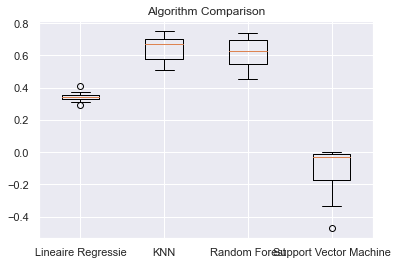

In [62]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score

models = []
models.append(('Lineaire Regressie', LinearRegression()))
models.append(('KNN', KNeighborsRegressor())) 
models.append(('Random Forest', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('Support Vector Machine', SVR(gamma='auto'))) # kernel = linear

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

Hieronder gaan we verder enkel gebruik maken van de Random Forest techniek.
Voor deze techniek gaan we met een grid search op zoek naar het model dat het beste het verbruik kan voorspellen.

In [63]:
from sklearn.model_selection import GridSearchCV
import numpy as np

model = RandomForestRegressor()

param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}

gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)

gsearch.fit(X_train, y_train)

best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.7359
mean_squared_log_error:  0.004
r2:  0.7337
MAE:  55.0668
MSE:  7212.8864
RMSE:  84.9287


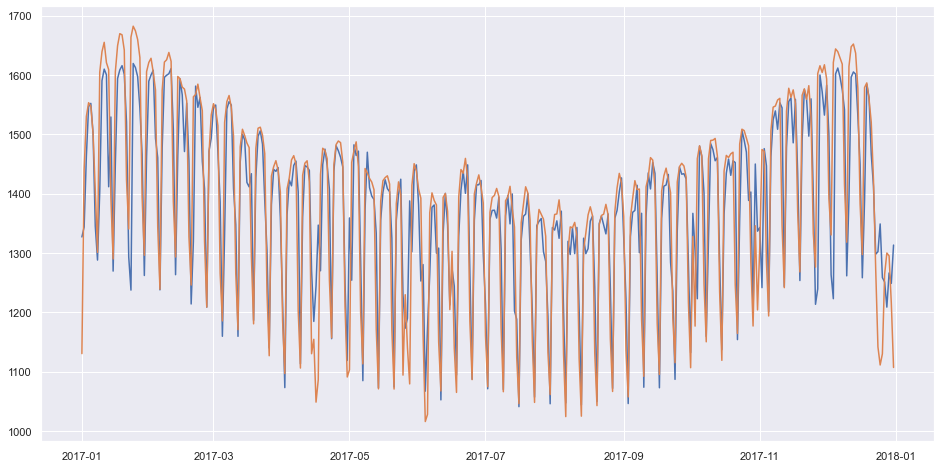

In [64]:
plt.figure(figsize=(16,8))
plt.plot(X_test.index, y_pred)
plt.plot(X_test.index, y_test)

## Poging 2

Tot nu toe is enkel het verbruik van de vorige dag in rekening gebracht.
We kunnen echter ook verder terug gaan het verleden, bvb tot 2 dagen.
Dit geeft het volgende resultaat.

In [65]:
# creating copy of original dataframe
data_consumption_2o = data_consumption.copy()

# inserting column with yesterday-1 values
data_consumption_2o['Yesterday-1'] = data_consumption_2o['Yesterday'].shift()
# inserting column with difference in yesterday-1 and yesterday-2 values.
data_consumption_2o['Yesterday-1_Diff'] = data_consumption_2o['Yesterday-1'].diff()
# dropping NAs
data_consumption_2o = data_consumption_2o.dropna()

In [66]:
X_train_2o = data_consumption_2o[:'2016'].drop(['Consumption'], axis = 1)
y_train_2o = data_consumption_2o.loc[:'2016', 'Consumption']
X_test = data_consumption_2o['2017'].drop(['Consumption'], axis = 1)
y_test = data_consumption_2o.loc['2017', 'Consumption']

C:\Users\jens.baetens3\AppData\Local\Temp\ipykernel_37256\2915009676.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data_consumption_2o['2017'].drop(['Consumption'], axis = 1)


In [68]:
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}

gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
gsearch.fit(X_train_2o, y_train_2o)

best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.8396
mean_squared_log_error:  0.0025
r2:  0.8394
MAE:  41.161
MSE:  4348.3858
RMSE:  65.9423


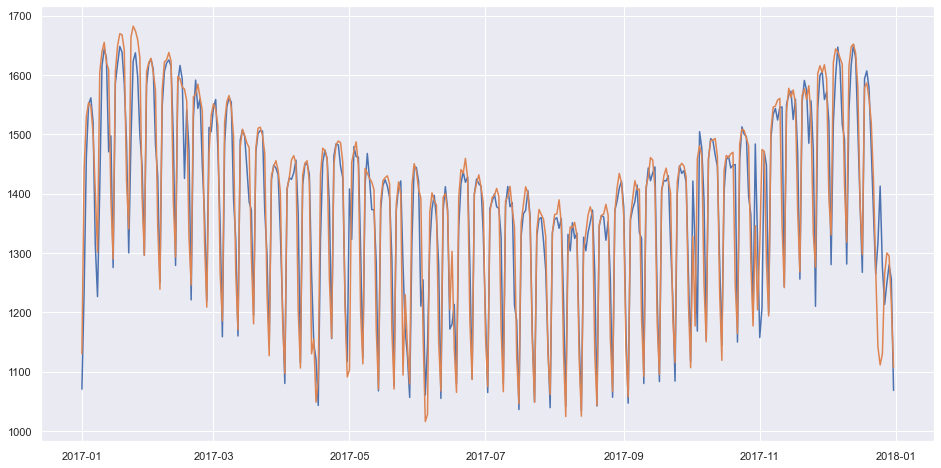

In [69]:
plt.figure(figsize=(16,8))
plt.plot(X_test.index, y_pred)
plt.plot(X_test.index, y_test)

## Poging 3

In de vorige twee pogingen is enkel gebruik gemaakt van informatie over het verbruik.
Het is ook mogelijk om de productie van zonnepanelen toe te voegen aan de dataset.
Dit resulteert in het volgende model.

In [70]:
data_consumption_2o_solar = data_consumption_2o.join(data[['Solar']])
data_consumption_2o_solar = data_consumption_2o_solar.dropna()
display(data_consumption_2o_solar.head())

,Consumption,Yesterday,Yesterday_Diff,Yesterday-1,Yesterday-1_Diff,Solar
Date,,,,,,
2012-01-01,948.128,1077.625,-122.241,1199.866,-27.022,6.587
2012-01-02,1269.581,948.128,-129.497,1077.625,-122.241,6.574
2012-01-03,1334.745,1269.581,321.453,948.128,-129.497,24.679
2012-01-04,1347.136,1334.745,65.164,1269.581,321.453,14.681
2012-01-05,1376.658,1347.136,12.391,1334.745,65.164,5.071


In [72]:
X_train_2o_solar = data_consumption_2o_solar[:'2016'].drop(['Consumption'], axis = 1)
y_train_2o_solar = data_consumption_2o_solar.loc[:'2016', 'Consumption']

X_test = data_consumption_2o_solar['2017'].drop(['Consumption'], axis = 1)
y_test = data_consumption_2o_solar.loc['2017', 'Consumption']

model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}

gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
gsearch.fit(X_train_2o_solar, y_train_2o_solar)

best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

C:\Users\jens.baetens3\AppData\Local\Temp\ipykernel_37256\45312733.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data_consumption_2o_solar['2017'].drop(['Consumption'], axis = 1)


explained_variance:  0.8446
mean_squared_log_error:  0.0024
r2:  0.844
MAE:  40.6679
MSE:  4223.2296
RMSE:  64.9864


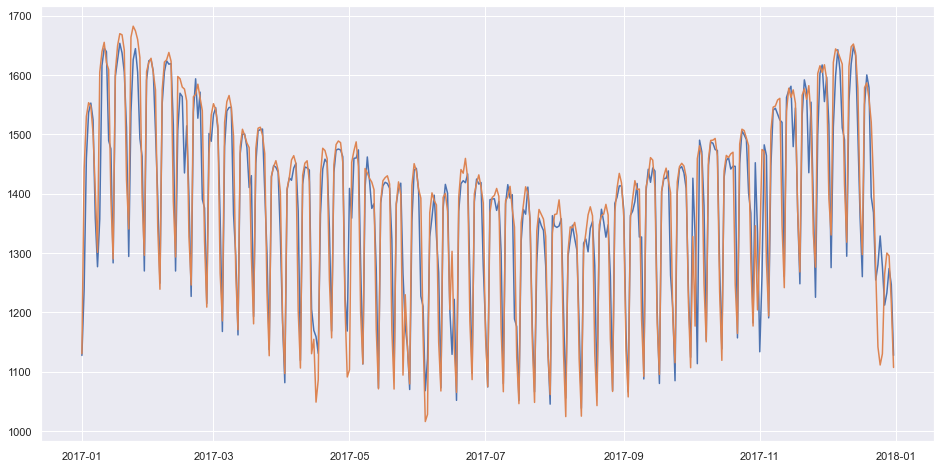

In [73]:
plt.figure(figsize=(16,8))
plt.plot(X_test.index, y_pred)
plt.plot(X_test.index, y_test)

# Poging 4

In het begin is er vastgesteld geweest dat de periodiciteit van de dataset een week is of 7 dagen.
Een ander idee voor een extra feature is om minstens het verbruik van van een week geleden toe te voegen.

In [76]:
data_consumption_2o_solar_weeklyShift = data_consumption_2o_solar.copy()
data_consumption_2o_solar_weeklyShift['Last_Week'] = data_consumption_2o_solar_weeklyShift['Consumption'].shift(7)
data_consumption_2o_solar_weeklyShift['Last_Week_Diff'] = data_consumption_2o_solar_weeklyShift['Last_Week'].diff()
data_consumption_2o_solar_weeklyShift = data_consumption_2o_solar_weeklyShift.dropna()
display(data_consumption_2o_solar_weeklyShift.head())

,Consumption,Yesterday,Yesterday_Diff,Yesterday-1,Yesterday-1_Diff,Solar,Last_Week,Last_Week_Diff
Date,,,,,,,,
2012-01-09,1443.371,1103.383,-72.305,1175.688,-115.527,5.264,1269.581,321.453
2012-01-10,1434.631,1443.371,339.988,1103.383,-72.305,17.827,1334.745,65.164
2012-01-11,1449.768,1434.631,-8.740,1443.371,339.988,10.849,1347.136,12.391
2012-01-12,1442.448,1449.768,15.137,1434.631,-8.740,18.023,1376.658,29.522
2012-01-13,1403.402,1442.448,-7.320,1449.768,15.137,18.778,1291.215,-85.443


In [78]:
X_train_2o_solar_weeklyShift = data_consumption_2o_solar_weeklyShift[:'2016'].drop(['Consumption'], axis = 1)
y_train_2o_solar_weeklyShift = data_consumption_2o_solar_weeklyShift.loc[:'2016', 'Consumption']
X_test = data_consumption_2o_solar_weeklyShift['2017'].drop(['Consumption'], axis = 1)
y_test = data_consumption_2o_solar_weeklyShift.loc['2017', 'Consumption']

model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}

gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
gsearch.fit(X_train_2o_solar_weeklyShift, y_train_2o_solar_weeklyShift)

best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

C:\Users\jens.baetens3\AppData\Local\Temp\ipykernel_37256\1052956340.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data_consumption_2o_solar_weeklyShift['2017'].drop(['Consumption'], axis = 1)


explained_variance:  0.9062
mean_squared_log_error:  0.0015
r2:  0.905
MAE:  29.3334
MSE:  2571.4034
RMSE:  50.709


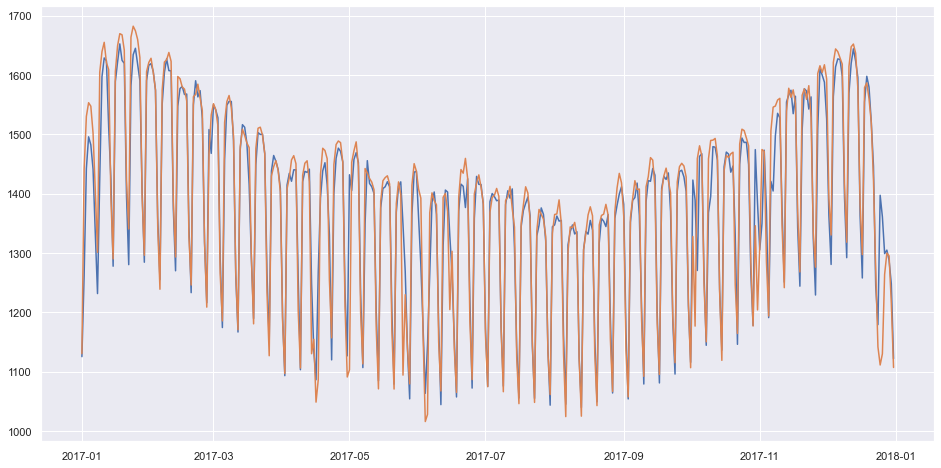

In [79]:
plt.figure(figsize=(16,8))
plt.plot(X_test.index, y_pred)
plt.plot(X_test.index, y_test)

## Belang van de features

Welke feature in de dataset levert nu het meest informatie op om het target te voorspellen?
Dit kan bepaald worden door het opstellen van een variable important plot.
In deze plot is het duidelijk te zien dat de informatie van de week ervoor veel belangrijker is om het verbruik te voorspellen dat de waarde van de dag ervoor.

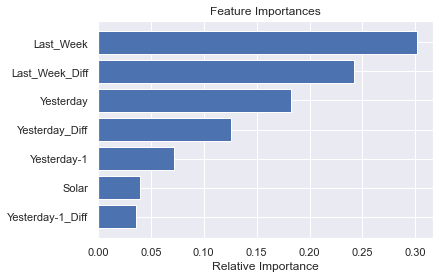

In [80]:
imp = best_model.feature_importances_
features = X_train_2o_solar_weeklyShift.columns
indices = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()